<a href="https://colab.research.google.com/github/covid19-tomography-analysis/clustering/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusterização
Fazer uma clusterização de imagens de COVID retiradas do repositório [COVID-CT-MD, COVID-19 computed tomography scan dataset applicable in machine learning and deep learning](https://www.nature.com/articles/s41597-021-00900-3), e analizar os resultados com as informações também contidas neste.

- [x] Importar imagens no Google Drive
- [x] Converter imagem DICOM para JPG
- [ ] Executar algoritmo de clusterização

Referências:  
- https://towardsdatascience.com/how-to-cluster-images-based-on-visual-similarity-cd6e7209fe34
- https://pycad.co/how-to-convert-a-dicom-image-into-jpg-or-png/


## Bibliotecas

### Instalação

#### Pacotes faltantes

In [ ]:
!pip install pydicom
!pip install pillow
!pip install pylibjpeg pylibjpeg-libjpeg pydicom
!pip install python-gdcm

  Using cached pydicom-2.3.0-py3-none-any.whl (2.0 MB)


     |████████████████████████████████| 4.3 MB 10.3 MB/s 
  Using cached pylibjpeg-1.4.0-py3-none-any.whl (28 kB)
  Using cached pylibjpeg_libjpeg-1.3.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
     |████████████████████████████████| 15.7 MB 7.0 MB/s 


  Using cached python_gdcm-3.0.12-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.6 MB)


#### Conda

In [ ]:
!pip install -q condacolab


In [ ]:
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
!conda install -c conda-forge gdcm -y

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

# All requested packages already installed.



### Carregamento e processamento de imagens

In [ ]:
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

from PIL import Image
from glob import glob
from pydicom import dcmread
import pylibjpeg
import gdcm

### Modelos

In [ ]:
from keras.applications.vgg16 import VGG16 
from keras.models import Model

### Clusterização e redução de dimensão

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Utilidades

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
from glob import glob

## Carregamento de dados

In [ ]:
file_names = glob(os.path.join('/content/drive/MyDrive/Classificação de Imagens/P050','*.dcm'))
print(file_names)

['/content/drive/MyDrive/Classificação de Imagens/P050/IM0049.dcm', '/content/drive/MyDrive/Classificação de Imagens/P050/IM0045.dcm', '/content/drive/MyDrive/Classificação de Imagens/P050/IM0047.dcm', '/content/drive/MyDrive/Classificação de Imagens/P050/IM0046.dcm', '/content/drive/MyDrive/Classificação de Imagens/P050/IM0050.dcm', '/content/drive/MyDrive/Classificação de Imagens/P050/IM0048.dcm', '/content/drive/MyDrive/Classificação de Imagens/P050/IM0044.dcm', '/content/drive/MyDrive/Classificação de Imagens/P050/IM0043.dcm', '/content/drive/MyDrive/Classificação de Imagens/P050/IM0042.dcm', '/content/drive/MyDrive/Classificação de Imagens/P050/IM0041.dcm', '/content/drive/MyDrive/Classificação de Imagens/P050/IM0038.dcm', '/content/drive/MyDrive/Classificação de Imagens/P050/IM0039.dcm', '/content/drive/MyDrive/Classificação de Imagens/P050/IM0040.dcm', '/content/drive/MyDrive/Classificação de Imagens/P050/IM0036.dcm', '/content/drive/MyDrive/Classific

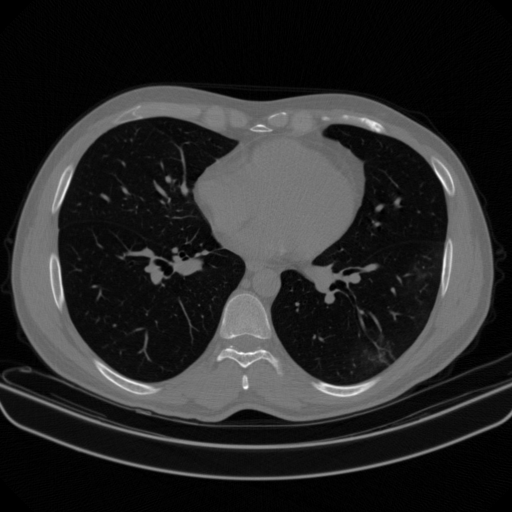

In [ ]:
def convert_dicom_to_jpg(file_name):
  image = dcmread(file_name)
  image.PhotometricInterpretation = 'YBR_FULL'
  arr = image.pixel_array.astype(float)

  rescaled_image = (np.maximum(arr, 0) / arr.max()) * 255 
  final_image = np.uint8(rescaled_image) 

  final_image = Image.fromarray(final_image)
  return final_image

images = []

for file_name in file_names:
  image = convert_dicom_to_jpg(file_name)
  images.append(image)


## Preprocessamento de dados